* Método de clasificación supervisada que estima la probabilidad de que un elemento X pertenezca a una clase C.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
data = pd.read_csv('vehiculos.csv')
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                   846 non-null float64
circularity                   846 non-null float64
distance_circularity          846 non-null float64
radius_ratio                  846 non-null float64
pr_axis_aspect_ratio          846 non-null float64
max_length_aspect_ratio       846 non-null float64
scatter_ratio                 846 non-null float64
elongatedness                 846 non-null float64
pr_axis_rectangularity        846 non-null float64
max_length_rectangularity     846 non-null float64
scaled_variance_major_axis    846 non-null float64
scaled_variance_minor_axis    846 non-null float64
scaled_radius_gyration        846 non-null float64
skewness_major_axis           846 non-null float64
skewness_minor_axis           846 non-null float64
kurtosis_minor_axis           846 non-null float64
kurtosis_major_axis           846 non-null float64
hollows_ratio               

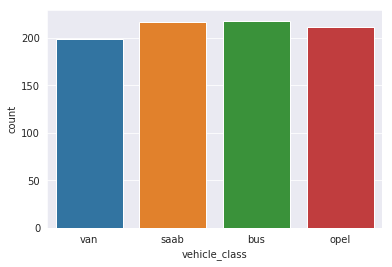

In [7]:
sns.countplot(data=data, x='vehicle_class')

In [8]:
y = data['vehicle_class']
x = data.drop('vehicle_class', axis=1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)

In [27]:
knn = KNeighborsClassifier(n_neighbors=4)  # modelo
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [28]:
predicciones = knn.predict(x_test)

In [29]:
print(confusion_matrix(y_test, predicciones))

[[53  4  6  0]
 [ 9 34 28  3]
 [ 6 24 24  7]
 [ 7  0  1 48]]


In [30]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.71      0.84      0.77        63
        opel       0.55      0.46      0.50        74
        saab       0.41      0.39      0.40        61
         van       0.83      0.86      0.84        56

   micro avg       0.63      0.63      0.63       254
   macro avg       0.62      0.64      0.63       254
weighted avg       0.62      0.63      0.62       254



### Encontremos el k mas optimo para nuestro modelo.

In [31]:
tasa_error = []
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    tasa_error.append(np.mean(predict != y_test))
    

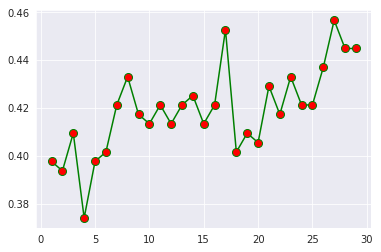

In [32]:
plt.plot(range(1, 30), tasa_error, 'g-o', markerfacecolor='red', markersize=8)

Vemos que el valor mas optimo es k = 4